In [112]:
%matplotlib inline
import pandas as pd

In [113]:
data = pd.read_csv("train.csv")

data = data.drop(labels = "Unnamed: 0", axis = 1)

In [114]:
results = pd.DataFrame(data.mean())

results.reset_index(inplace = True)

results.columns = ['Column', 'Mean']

results['rater'] = results['Column'].str[-1:]

results['category'] = results['Column'].str[0:-1]

results[['rater', 'category', 'Mean']].pivot(index = 'category', columns = 'rater').to_csv('pct_by_rater.csv')

In [ ]:
#some tweets have been graded 4 times and some of them 3 times

In [116]:
labels = ['CAPS', 'Obscenity', 'Threat', 'hatespeech', 'namecalling', 'negprejudice', 'noneng', 'porn', 'stereotypes']

In [117]:
#calculate the percent of raters who gave it that label

for label in labels:
    cols = [label + str(x) for x in range(1,8)]
    data[label] = data[cols].sum(axis = 1)/(7 - data[cols].isnull().sum(axis = 1))

In [118]:
#calculate the number of raters who gave it that label

for label in labels:
    cols = [label + str(x) for x in range(1,8)]
    data[label + '_num_yes'] = data[cols].sum(axis = 1)
    data[label + '_num_raters'] = 7 - data[cols].isnull().sum(axis = 1)

In [102]:
data[labels].describe()

,CAPS,Obscenity,Threat,hatespeech,namecalling,negprejudice,noneng,porn,stereotypes
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.015129,0.060619,0.042782,0.036217,0.093565,0.173439,0.080854,0.008919,0.104901
std,0.103425,0.199201,0.149277,0.138307,0.225583,0.279767,0.267460,0.082054,0.222132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


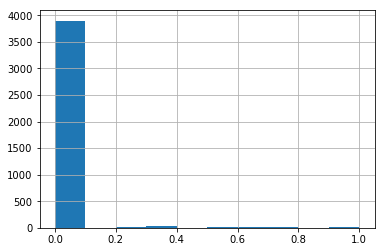

In [44]:
data['CAPS'].hist()

In [125]:
#50% of negative prejudice labels are corrobarated by another rater

sum(data['negprejudice_num_yes'] > 1)/sum(data['negprejudice_num_yes'] > 0)

0.49851190476190477

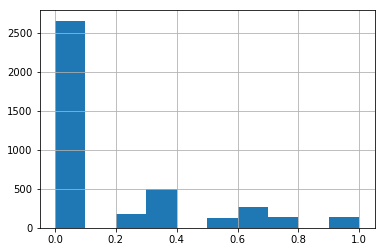

In [46]:
data['negprejudice'].hist()

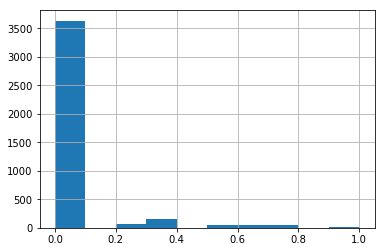

In [47]:
data['Threat'].hist()

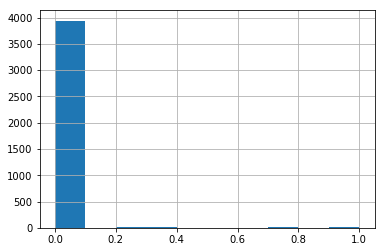

In [48]:
data['porn'].hist()

In [126]:
#42% of streotype labels are corroborated by another rater

sum(data['stereotypes_num_yes'] > 1)/sum(data['stereotypes_num_yes'] > 0)

0.41993281075027994

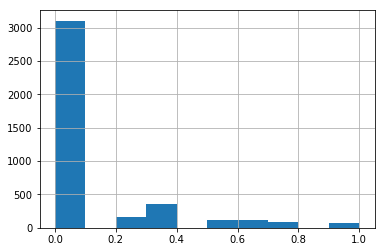

In [50]:
data['stereotypes'].hist()

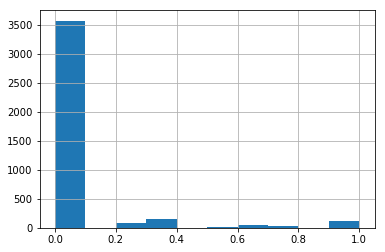

In [51]:
data['Obscenity'].hist()

In [128]:
#30% of hatespeech labels are corroborated by another rater

sum(data['hatespeech_num_yes'] > 1)/sum(data['hatespeech_num_yes'] > 0)

0.29729729729729731

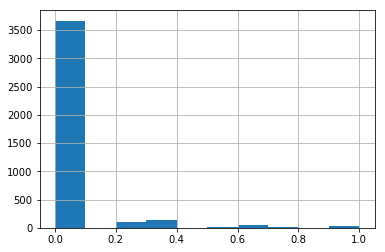

In [52]:
data['hatespeech'].hist()

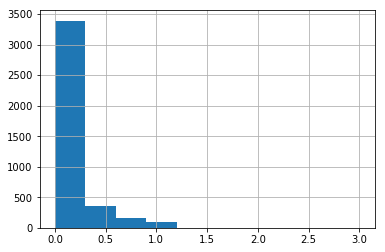

In [53]:
data['namecalling'].hist()

overall, kind of rare that all the raters agree
we could count all the tweets that have even one rating as the category?
to deal with class imbalace?

if we do "classified at least once" as the threshold then, tweets with 4 raters will be 
more likely to get classified than tweets with 3 raters
(which might be fine if the order of the tweets is random)
unless we randomly select 3 of the ratings for each one and judge by whether there was a positive rating
among them.